In [1]:
import tensorflow as tf
import tensorboard 
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, Activation, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os, cv2

In [2]:
cv2.imread('/Users/abhinavsingh/Desktop/image_data/Authorization_Letter/S20210909001546724503001.jpg').shape

(2340, 1654, 3)

In [3]:
directory= '/Users/abhinavsingh/Desktop/image_data/'

In [4]:
train= image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, validation_split=.2)

In [5]:
train_data= train.flow_from_directory('/Users/abhinavsingh/Desktop/image_data/', 
                                      target_size=(280,280), 
                                      batch_size=32, 
                                      class_mode='categorical', 
                                      shuffle=True,
                                      subset='training'
                                      )

valid_data= train.flow_from_directory('/Users/abhinavsingh/Desktop/image_data/',
                                      target_size=(280,280), 
                                      batch_size=32, 
                                      class_mode='categorical', 
                                      shuffle=True,
                                      subset='validation'
                                     )

Found 21810 images belonging to 12 classes.
Found 5448 images belonging to 12 classes.


In [6]:
imgs, labels= next(train_data)

In [7]:
def plotImages(images_arr):
    fig, axes= plt.subplots(1,10,figsize=(20,20))
    axes= axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

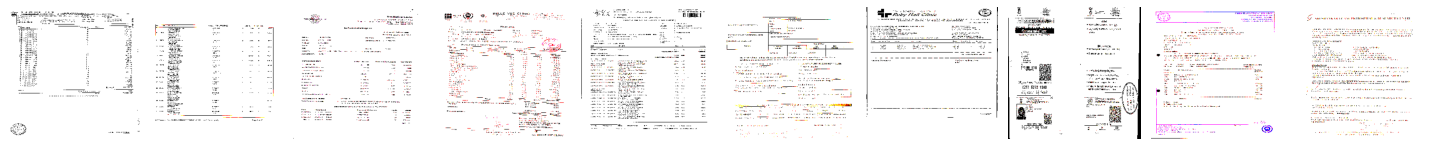

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.

In [8]:
plotImages(imgs)
print(labels)

In [9]:
train_data.class_indices

{'Authorization_Letter': 0,
 'Claim_Form': 1,
 'Consolidated_Bill': 2,
 'Detailed_Bill': 3,
 'Discharge_Summary': 4,
 'KYC': 5,
 'Lab_Reports': 6,
 'Membership_Document': 7,
 'NEFT': 8,
 'Others': 9,
 'Prescription': 10,
 'Query_Reply': 11}

In [10]:
train_data.classes

array([ 0,  0,  0, ..., 11, 11, 11], dtype=int32)

In [11]:
model= Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(280,280,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))

model.add(Dense(12, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 278, 278, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 139, 139, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 137, 137, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 68, 68, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 66, 66, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 512)       1

In [13]:
stopper = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5)

In [14]:
history= model.fit(train_data, validation_data= valid_data, steps_per_epoch=6, epochs=20, validation_steps=2, callbacks= [stopper])

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-12-24 10:51:51.322357: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-24 10:51:51.322833: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - ETA: 0s - loss: 826.8330 - accuracy: 0.1497WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x1677c8310> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6/6 [==============================] - 36s 6s/step - loss: 807.1292 - accuracy: 0.1529 - val_loss: 7.8717 - val_accuracy: 0.0938
Epoch 2/2

In [15]:
pred= model.predict(x= valid_data)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [16]:
np.round(pred)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
cm= confusion_matrix(y_true= valid_data.classes, y_pred= np.argmax(pred, axis= -1))

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    plt.figure(figsize= (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
valid_data.class_indices

{'Authorization_Letter': 0,
 'Claim_Form': 1,
 'Consolidated_Bill': 2,
 'Detailed_Bill': 3,
 'Discharge_Summary': 4,
 'KYC': 5,
 'Lab_Reports': 6,
 'Membership_Document': 7,
 'NEFT': 8,
 'Others': 9,
 'Prescription': 10,
 'Query_Reply': 11}

Confusion matrix, without normalization
[[  0  26   4  29   5   1   4   0   0   0   0   0]
 [  2 349  82 578  72  24 108   0  16   0   0   0]
 [  3 152  38 223  25   5  32   0   6   0   0   0]
 [  3 444 117 772  79  27 173   0  14   1   0   0]
 [  0 123  37 225  20   6  45   0   3   1   0   0]
 [  1  67  27 128   8   8  29   0   0   0   0   0]
 [  2 263  66 407  53  15  84   0   6   0   0   0]
 [  1  22   9  38   4   1  12   0   0   0   0   0]
 [  0   9   3  26   6   1   7   0   1   0   0   0]
 [  1  71  21  98   9   3  21   0   1   0   0   0]
 [  2   9   4  19   3   1   5   0   1   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0]]


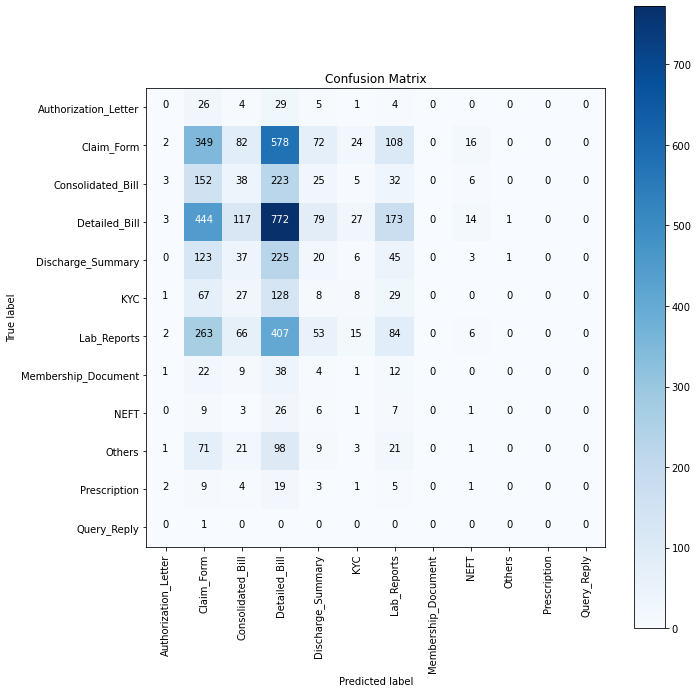

In [20]:
cm_plot_labels= ['Authorization_Letter', 'Claim_Form', 'Consolidated_Bill', 'Detailed_Bill', 'Discharge_Summary', 'KYC', 'Lab_Reports', 'Membership_Document', 'NEFT', 'Others', 'Prescription', 'Query_Reply']
plot_confusion_matrix(cm= cm, classes= cm_plot_labels, title= 'Confusion Matrix')